In [1]:
import matplotlib.pyplot as plt
import source.dataset
import torch
_  = torch.manual_seed(0)

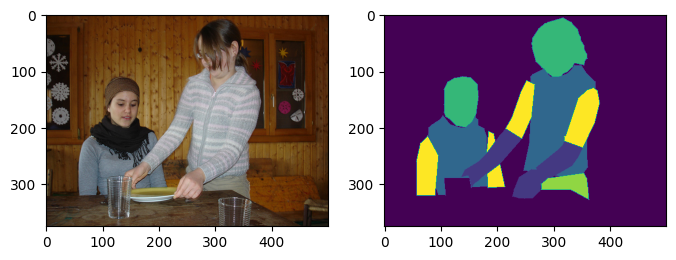

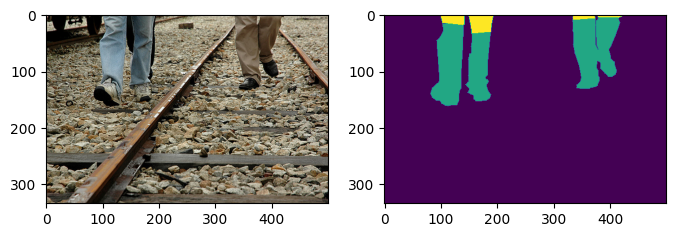

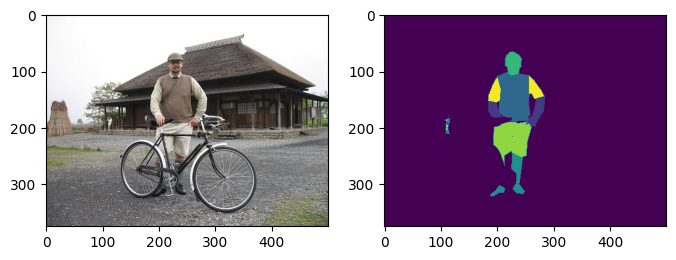

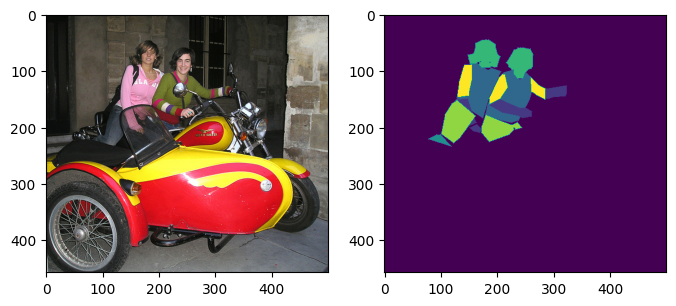

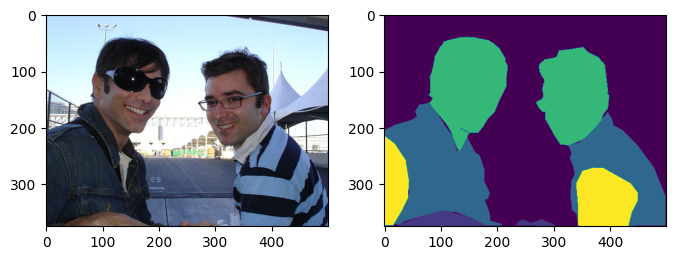

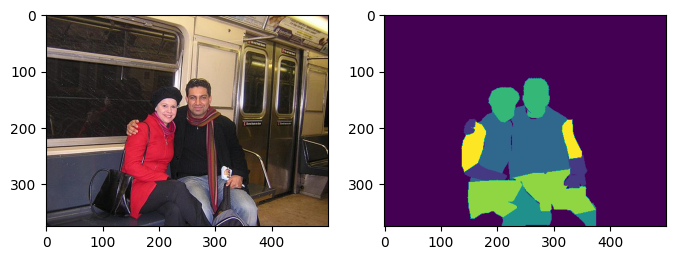

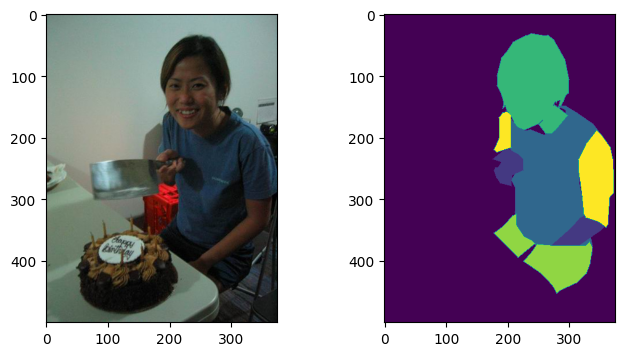

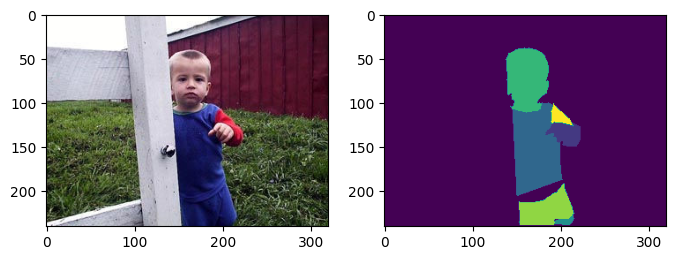

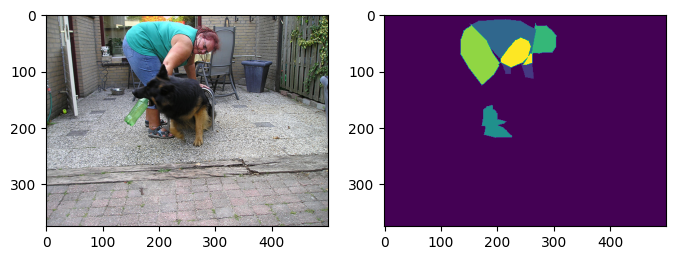

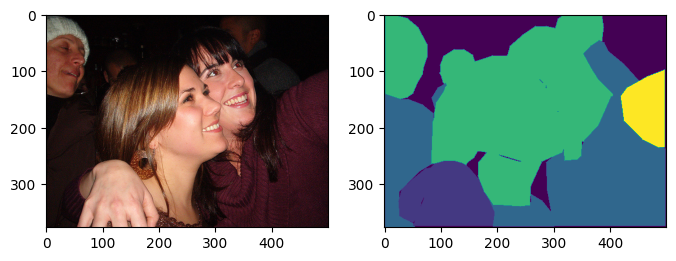

In [8]:
dataset = source.dataset.PascalPartDataset()
random_indexes = torch.randint(low=0, high=len(dataset), size=(10,))
for index in random_indexes:
    image_as_tensor, mask_as_tensor = dataset[index]

    figure = plt.figure(figsize=(8, 4))
    figure.add_subplot(1, 2, 1)
    plt.imshow(image_as_tensor.permute(1, 2, 0))
    figure.add_subplot(1, 2, 2)
    plt.imshow(mask_as_tensor)
    plt.show()